<a href="https://colab.research.google.com/github/natdebandi/migmobs2/blob/main/migration_v1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**



##Exploratory migration data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


## Migration data

Datos recuperados de registros administrativos

In [27]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/db_migracion.csv'

df_migracion = pd.read_csv(file_path)


In [28]:
df_migracion

,country_code,year,value,origin,variable_name,indicator,fuente
0,ARG,2015,31028477,Total,entries_mouvements,Migration entries movements,DNM
1,ARG,2015,30911367,Total,exits_mouvements,Migration exit movement,DNM
2,ARG,2016,36405194,Total,entries_mouvements,Migration entries movements,DNM
3,ARG,2016,36431038,Total,exits_mouvements,Migration exit movement,DNM
4,ARG,2017,39680490,Total,entries_mouvements,Migration entries movements,DNM
...,...,...,...,...,...,...,...
380,CHL,2019,149889,Total,temporary_residence,Temporary residences,SERMIG
381,CHL,2020,57618,Total,temporary_residence,Temporary residences,SERMIG
382,CHL,2021,51906,Total,temporary_residence,Temporary residences,SERMIG
383,CHL,2022,89659,Total,temporary_residence,Temporary residences,SERMIG


In [29]:
countries = ['ARG', 'CHL','BOL','VEN']

In [30]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df_bilateral_mig = pd.read_csv(file_path)
print(df_bilateral_mig.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [22]:
df_migracion['value'] = pd.to_numeric(df_migracion['value'], errors='coerce').astype('float64')

In [24]:
df_migracion = df_migracion.dropna(subset=['value'])


In [26]:
df_migracion

,country_code,year,value,origin,variable_name,indicator,fuente
0,ARG,2015,31028477.0,Total,entries_mouvements,Migration entries movements,DNM
1,ARG,2015,30911367.0,Total,exits_mouvements,Migration exit movement,DNM
2,ARG,2016,36405194.0,Total,entries_mouvements,Migration entries movements,DNM
3,ARG,2016,36431038.0,Total,exits_mouvements,Migration exit movement,DNM
4,ARG,2017,39680490.0,Total,entries_mouvements,Migration entries movements,DNM
...,...,...,...,...,...,...,...
380,CHL,2019,149889.0,Total,temporary_residence,Temporary residences,SERMIG
381,CHL,2020,57618.0,Total,temporary_residence,Temporary residences,SERMIG
382,CHL,2021,51906.0,Total,temporary_residence,Temporary residences,SERMIG
383,CHL,2022,89659.0,Total,temporary_residence,Temporary residences,SERMIG


In [31]:
df_migracion['value'] = pd.to_numeric(df_migracion['value'], errors='coerce').astype('Int64')

In [32]:
df_entries = df_migracion[df_migracion['variable_name'] == 'entries_mouvements']

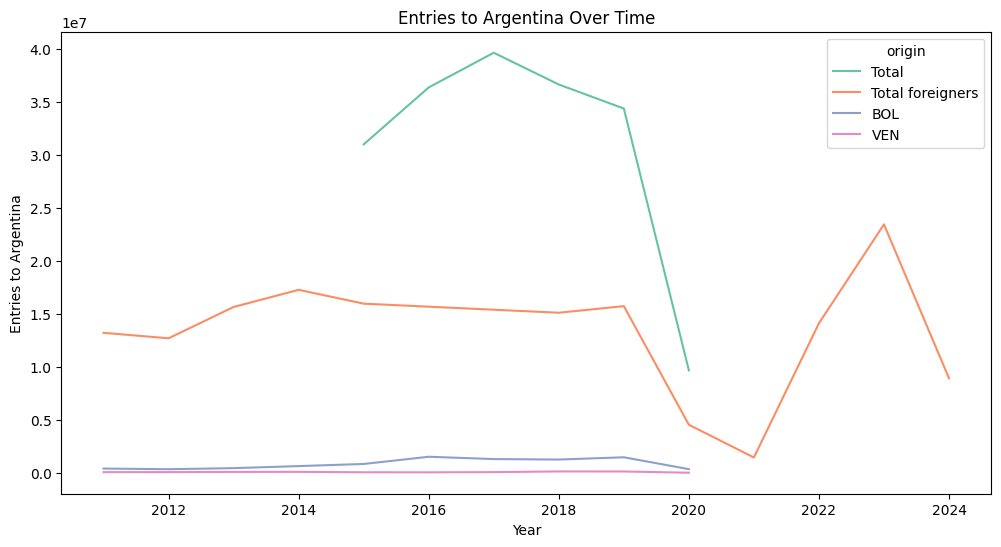

In [33]:
# prompt: grafico de linea de stock del dataframe  top5_iso_or_arg por year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='origin', data=df_entries, palette = "Set2")
plt.title('Entries to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Entries to Argentina')
plt.show()